# First OLS

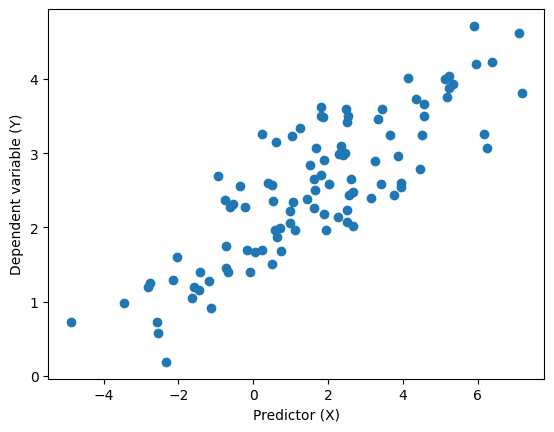

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)

# Generate synthetic data
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
Y = 2 + 0.3 * X + res                  # Actual values of Y

# Plot the data
plt.scatter(X, Y)
plt.xlabel('Predictor (X)')
plt.ylabel('Dependent variable (Y)')
plt.show()


In [20]:
# Add a column of ones to X to account for the intercept
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

# Compute the least squares solution
b = (np.linalg.inv(X_b.T @ X_b) @ X_b.T) @ Y

print("Estimated coefficients:")
print("Intercept:", b[0])
print("Slope:", b[1])


Estimated coefficients:
Intercept: 2.0031670124623426
Slope: 0.3229396867092762


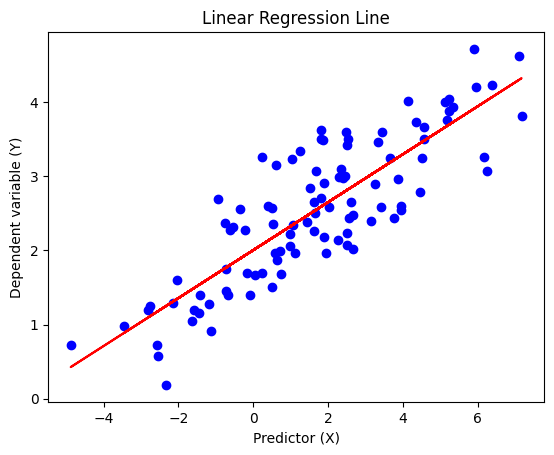

In [21]:
# Plot the data
plt.scatter(X, Y, color='blue')
plt.xlabel('Predictor (X)')
plt.ylabel('Dependent variable (Y)')

# Calculate the regression line
Y_pred = X_b.dot(b)

# Plot the regression line
plt.plot(X, Y_pred, color='red')
plt.title('Linear Regression Line')
plt.show()


# Influence matrix 

- $\hat{y}$ : predicted 
- $Y$ : reponse
- $X$ : input 

Influence matrix $H$ maps the response to the predicted.

$Hy = \hat{y}$

This is just the projection $A^T(A^TA)^{-1}Ax$

In [22]:
H = X_b @ np.linalg.inv(X_b.T @ X_b) @ X_b.T

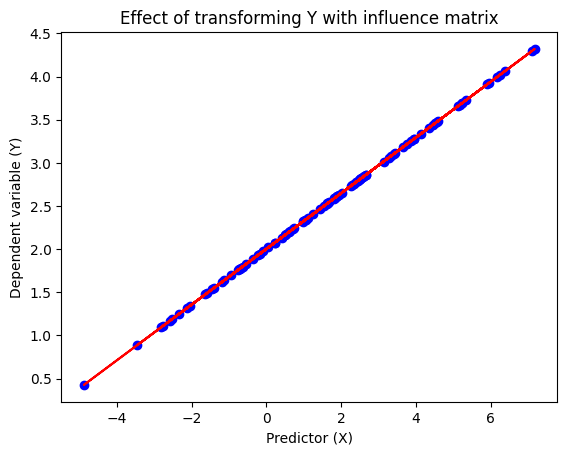

In [23]:
# Calculate the regression line
Y_influence = H.dot(Y)

plt.scatter(X, Y_influence, color='blue')
plt.xlabel('Predictor (X)')
plt.ylabel('Dependent variable (Y)')



# Plot the regression line
plt.plot(X, Y_pred, color='red')
plt.title('Effect of transforming Y with influence matrix')
plt.show()


# Annihilator matrix

Bringing in residual, subsituting influence matrix:

$r = y - \hat{y}$

$r = y - Py$

$r = (I - P)y$


$r = My$

Where $M = I - P$

So this is saying that the residuals can be recoverd from response by applying $M$

In [10]:
M = np.eye(len(H)) - H

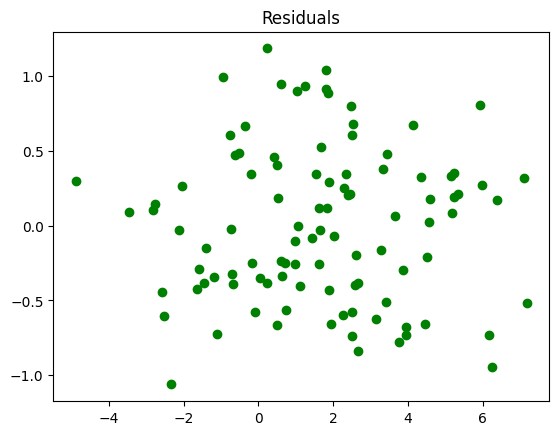

In [24]:
# Calculate the regression line
residuals = M @ Y

plt.scatter(X, residuals, color='green')

plt.title('Residuals')
plt.show()


#


So $M$ is a property of a set of predictions, and is calculated by:
- coefficents <- OLS(X,Y)
- predictions <- (coefficents, X)
- Influence matrix <- (predictions, Y)
- Anhillator matrix <- (influence matrix, Y, predictions)



# Why? 

So anhillator matrix can be viewed as a transform on Y, conditioned on X which produces the residuals from the OLS fit 

i.e $r = M_Xy$

This gives a nice short hand for summarising regression resutls like FWL 

# FWL

1. Residuals are uncorrelated with input variables

Given:
- $Y \sim \beta_1X_1 + \beta_2X_2$
- $M_{X_1} \sim M_{X_1}X_2 \beta_2$

The $\beta_2$ coefficients are the same. 

Mean: -0.05
Variance: 0.97
Skewness: 0.03
Kurtosis: -0.05


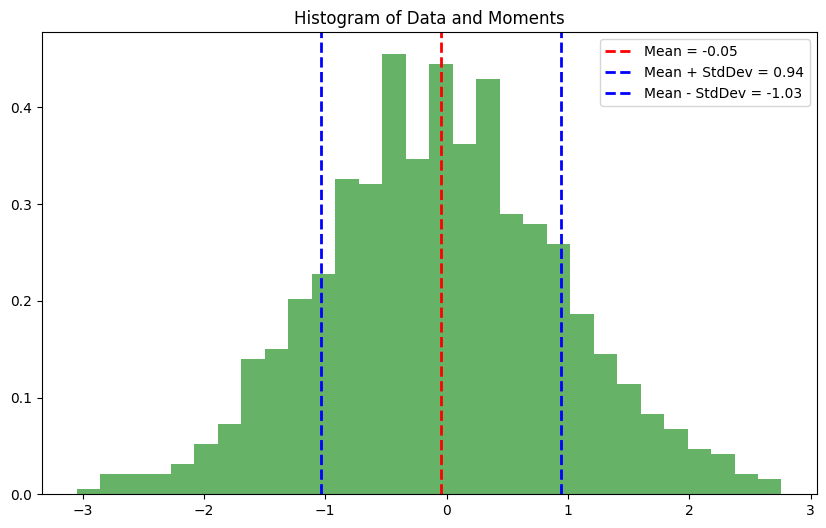

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Generate synthetic data for demonstration
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution

# Compute moments
mean = np.mean(data)
variance = np.var(data)
skewness = skew(data)
kurt = kurtosis(data)

# Print computed moments
print(f"Mean: {mean:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")  # Excess kurtosis, subtract 3 for Fisher's definition

# Plotting the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, alpha=0.6, color='g', density=True)
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean = {mean:.2f}')
plt.axvline(mean + np.sqrt(variance), color='b', linestyle='dashed', linewidth=2, label=f'Mean + StdDev = {mean + np.sqrt(variance):.2f}')
plt.axvline(mean - np.sqrt(variance), color='b', linestyle='dashed', linewidth=2, label=f'Mean - StdDev = {mean - np.sqrt(variance):.2f}')
plt.title('Histogram of Data and Moments')
plt.legend()
plt.show()
